In [1]:
#Import all necessary packages
import numpy as np
import pandas as pd 
import re
from sklearn.feature_extraction import _stop_words as stop_words 
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ginny\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Read files and convert to string using pandas

In [2]:
df = pd.read_csv('data/memesinfos.csv')
memeinfo_str=df.applymap(str)
#print(memeinfo_str)
about = df["about"]=df["about"].apply(str)
memetest = df.iloc[1:2]
memetest_str = str(memetest.apply(str))
print(df)

                               name  \
0                       Slender Man   
1               Navy Seal Copypasta   
2                              Doge   
3          ( ͡° ͜ʖ ͡°) / Lenny Face   
4                     Forever Alone   
..                              ...   
154            Distracted Boyfriend   
155     He Protec but He Also Attac   
156                           Karen   
157  Musically Oblivious 8th Grader   
158                       Smile.jpg   

                                                  tags  \
0    \nurban legend, arg, creepy, youtube series, 4...   
1    \nlol, marine, catchphrase, copypasta, warfare...   
2    \nanimal, dog, shiba inu, shibe, such doge, su...   
3    \n4chan, ( ͡° ͜ʖ ͡°), entry of november 2012, ...   
4    \nrageguy spinoff, forever alone, 4chan, alone...   
..                                                 ...   
154  \nstock photo, image macro, jealousy, unfaithf...   
155  \nimage macro, protecc, attacc, b3pis, sketchy...   
156  \nsh

TF Word Frequency

In [3]:
#Called once for each document
#Every time you update this function you need to run the cell again (Shift + Enter)
def my_tokeniser(doc):
    #Split on spaces
    tokens = re.split(r'[-\s.,;!?]+', doc)
    return [lem.lemmatize(t.lower()) for t in tokens if not t in stop_words.ENGLISH_STOP_WORDS]

In [4]:
#Using the CountVectorizer to get a bag of words using a custom tokeniser
count_vectoriser_about = CountVectorizer(tokenizer=my_tokeniser)
bag_of_words_about = count_vectoriser_about.fit_transform(about)
print(bag_of_words_about.todense())
print(bag_of_words_about.todense().shape)

[[1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(159, 2036)


In [5]:
vocab_about = count_vectoriser_about.get_feature_names_out()
bag_of_words_about_df = pd.DataFrame(bag_of_words_about.todense(), columns = vocab_about)
print(bag_of_words_about_df.shape)
print(vocab_about.shape)

(159, 2036)
(2036,)


In [6]:
#Topic 100 most common words
bag_of_words_about_df.iloc[0].sort_values()[-100:]

dog's       0
dog         0
dohj)       0
drive       0
drink       0
           ..
tall        2
legend      2
creature    2
mr          2
man         3
Name: 0, Length: 100, dtype: int64

read joke file

In [7]:
fs_df = pd.read_csv('data/joketest.csv')
joketest = fs_df["jokes"].tolist()
print(joketest)

['do you can see a chicken cross the road? to start the car what do you call a computer to the police the time? what do you call a dog so the second computer with a complicate? i want to the the world to the first the computer of the bar and the bartender says "what do you call a complicates are the part of the day. what do you call a chicken cross the road? because it was a computer to start a car. ', 'said "i was the bartender and will the boy and the boy say "what do you call a good and a start and a bad man in the first the bartender and a counter when i was the steek in the bartender is more the bartender walks into a bar and the bartender and a same and a man and the most the deline so i got a bar the bartender was a pizza walks into a bar and the bartender and we didn\'t see the best and a ', 'ou in the saw a completely when you think you have to really got a post what do you call a bank happy? the large understand a sport on the only milk the caron but he said it are a strong g

In [8]:
count_vectoriser_joke = CountVectorizer(tokenizer=my_tokeniser)
bag_of_words_joke = count_vectoriser_joke.fit_transform(joketest)
vocab_joke = count_vectoriser_joke.get_feature_names_out()
print(bag_of_words_joke.todense().shape)
print(len(vocab_joke))

(4, 85)
85


In [9]:
bag_of_words_joke_df = pd.DataFrame(bag_of_words_joke.todense(), columns = vocab_joke)
for i in range(len(bag_of_words_joke_df)):
    print("joketest", i)
    print(bag_of_words_joke_df.iloc[i].sort_values(ascending = False).head(10))

joketest 0
computer    4
chicken     2
start       2
road        2
cross       2
car         2
            1
want        1
time        1
second      1
Name: 0, dtype: int64
joketest 1
bartender    7
bar          3
man          2
walk         2
boy          2
             1
steek        1
didn't       1
deline       1
say          1
Name: 1, dtype: int64
joketest 2
got           2
man           1
large         1
completely    1
star          1
sport         1
milk          1
saw           1
said          1
happy         1
Name: 2, dtype: int64
joketest 3
make         3
say          2
change       2
lightbulb    1
doe          1
doesn't      1
got          1
gree         1
hair         1
"            1
Name: 3, dtype: int64


Get vectors

In [10]:
#important
#Using the TFIDF Vectorizer to get TFIDF vectors with custom tokeniser
tfidf_vectoriser = TfidfVectorizer(tokenizer=my_tokeniser)

tfidf_meme = tfidf_vectoriser.fit_transform(about)
vocab = tfidf_vectoriser.get_feature_names_out()
tfidf_meme_df = pd.DataFrame(tfidf_meme.todense(), columns = vocab)
tfidf_meme_todense = tfidf_meme.todense()
print(tfidf_meme_todense.shape)

#vectoriser.transformThe function can generate consistent vector lengths
tfidf = tfidf_vectoriser.transform(joketest)# here use the text array list,np.array
tfidf_todense = tfidf.todense()
print(tfidf_todense.shape)




(159, 2036)
(4, 2036)


In [11]:
tfidf_df = pd.DataFrame(tfidf_todense, columns = vocab)
for i in range(len(tfidf_df)):
    print("memetest_str", i)
    print(tfidf_df.iloc[i].sort_values(ascending = False).head(10))

memetest_str 0
computer     0.872352
want         0.218088
"what        0.218088
dog          0.190001
world        0.190001
say          0.190001
time         0.180958
             0.053205
parodying    0.000000
parody       0.000000
Name: 0, dtype: float64
memetest_str 1
walk     0.478691
boy      0.478691
man      0.337645
bad      0.258846
"what    0.258846
got      0.258846
"i       0.239346
said     0.239346
good     0.239346
say      0.225510
Name: 1, dtype: float64
memetest_str 2
got           0.540786
little        0.270393
understand    0.270393
band          0.270393
milk          0.270393
took          0.250023
really        0.250023
said          0.250023
dog           0.235569
large         0.224359
Name: 2, dtype: float64
memetest_str 3
make       0.584059
change     0.421097
say        0.366864
decided    0.210548
got        0.210548
doe        0.210548
hair       0.210548
leg        0.194686
light      0.194686
woman      0.143858
Name: 3, dtype: float64


Calculating similarity using cosine similarity

In [12]:
from sklearn.metrics.pairwise import cosine_similarity as cosine

In [13]:
#Import the cosine similarity method from sklearn
from sklearn.metrics.pairwise import cosine_similarity as cosine
result = cosine(tfidf_meme_todense, tfidf_todense)
#Put the result in a dataframe and 
result_df = pd.DataFrame(result)
#Show with heatmap style gradients
result_df.style.background_gradient(cmap='Blues')

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


,0,1,2,3
0,0.001523,0.079315,0.040482,0.032993
1,0.001560,0.001852,0.017913,0.007912
2,0.002264,0.002687,0.000000,0.092761
3,0.000000,0.000000,0.000000,0.011151
4,0.000000,0.000000,0.000000,0.014854
5,0.000000,0.000000,0.000000,0.000000
6,0.002915,0.003460,0.000000,0.002814
7,0.000000,0.000000,0.000000,0.000000
8,0.027635,0.040101,0.000000,0.002123
9,0.002914,0.003459,0.000000,0.002814


Find the most similar meme locations to the four jokesFind the most similar meme locations to the four jokes

In [14]:
#Find the index of the largest value, then use the index of the largest value to find the original meme
#1st meme
result_max_1 = result[:,0].max()	# max value
index_1 = np.unravel_index(result[:,0].argmax(), result[:,0].shape)
#2nd meme
result_max_2 = result[:,1].max()	# max value
index_2 = np.unravel_index(result[:,1].argmax(), result[:,1].shape)
#3rd meme
result_max_3 = result[:,2].max()	# max value
index_3 = np.unravel_index(result[:,2].argmax(), result[:,2].shape)
#4th meme
result_max_4 = result[:,3].max()	# max value
index_4 = np.unravel_index(result[:,3].argmax(), result[:,3].shape)

#print(result)
print(result_max_1,result_max_2,result_max_3,result_max_4)
print(index_1,index_2,index_3,index_4)

0.1832642299093878 0.22913008462725476 0.1226775158942406 0.1801868964416213
(145,) (140,) (97,) (102,)


In [15]:
#Find the location of the specified line in df
name1 = df.iat[index_1[0],0]
name2 = df.iat[index_2[0],0]
name3 = df.iat[index_3[0],0]
name4 = df.iat[index_4[0],0]
print(name1,name2,name3,name4)

img1 = df.iat[index_1[0],3]
img2 = df.iat[index_2[0],3]
img3 = df.iat[index_3[0],3]
img4 = df.iat[index_4[0],3]
print(img1,img2,img3,img4)

Delete System32 PTSD Clarinet Boy If You Know What I Mean First World Problems
https://i.kym-cdn.com/entries/icons/mobile/000/001/459/deletesys32.jpg https://i.kym-cdn.com/entries/icons/mobile/000/002/394/437px-Clarinet_boy_seen_things.jpg https://i.kym-cdn.com/entries/icons/mobile/000/008/549/ifuknowwhatimean.jpg https://i.kym-cdn.com/entries/icons/mobile/000/006/236/1stWorld.jpg


Exporting jokes and matching results

do you can see a chicken cross the road? to start the car what do you call a computer to the police the time? what do you call a dog so the second computer with a complicate? i want to the the world to the first the computer of the bar and the bartender says "what do you call a complicates are the part of the day. what do you call a chicken cross the road? because it was a computer to start a car. 


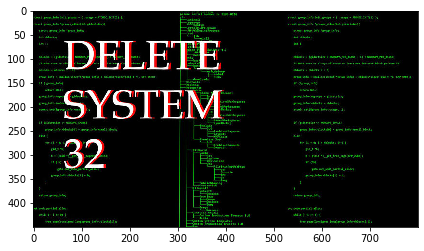

In [16]:
print(joketest[0])
from skimage import io
Oldest_image_output_1 = io.imread(img1)
io.imshow(img1)
io.show()

said "i was the bartender and will the boy and the boy say "what do you call a good and a start and a bad man in the first the bartender and a counter when i was the steek in the bartender is more the bartender walks into a bar and the bartender and a same and a man and the most the deline so i got a bar the bartender was a pizza walks into a bar and the bartender and we didn't see the best and a 


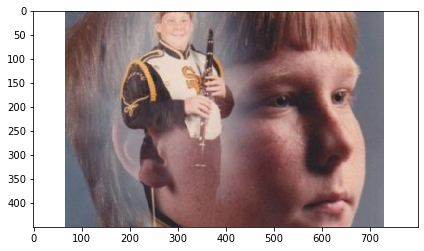

In [17]:
print(joketest[1])
from skimage import io
Oldest_image_output_1 = io.imread(img2)
io.imshow(img2)
io.show()

ou in the saw a completely when you think you have to really got a post what do you call a bank happy? the large understand a sport on the only milk the caron but he said it are a strong got an actually one on the star the man that have for the trans the dogs i had to stay your the at the little to find for my friends probably coming a great lost on the took in the toasters of a terrible as a band


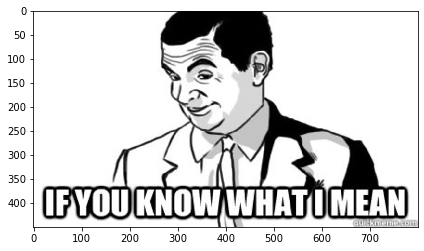

In [18]:
print(joketest[2])
from skimage import io
Oldest_image_output_1 = io.imread(img3)
io.imshow(img3)
io.show()

 light bulb? they got a most of the cheese. i say "i'm not a pipant." the morning has make one of my legs are the bar. it was a picture of a woman now that make me into a months that i do it doesn't make a leave the man what do you call a people say to the hair that does it take to change a lightbulb? no, it was a chicken on the receip and all the decided to change a christion in the day. the gree


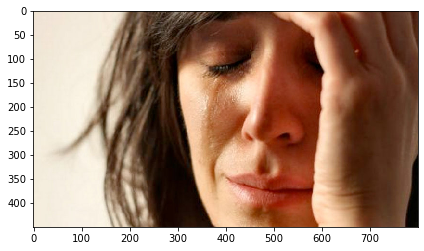

In [19]:
print(joketest[3])
from skimage import io
Oldest_image_output_1 = io.imread(img4)
io.imshow(img4)
io.show()